In [ ]:
%load_ext autoreload
%autoreload 2

In [14]:
import torch.nn as nn
import torch

from adversarials import ClassificationAdversarials
from utils import MnistData, Clipper
from models import ModelManager, ModelType

In [3]:
max_norm = 50 / 255

In [4]:
model = ModelManager.get_trained(ModelType.MnistCnnB)

In [5]:
batch_size = 10

In [6]:
data = MnistData(True)

In [10]:
def fgsm(model: nn.Module, benign_examples: torch.Tensor, labels: torch.Tensor, max_norm) -> torch.Tensor:
    loss_fn = nn.CrossEntropyLoss()
    benign_examples = benign_examples.detach()
    benign_examples.requires_grad = True
    if benign_examples.grad is not None:
        benign_examples.grad.zero_()
    loss = loss_fn(model(benign_examples), labels)
    loss.backward()
    adversarial_examples = benign_examples + max_norm * benign_examples.grad.apply_(lambda x: 1 if x >= 0 else -1)
    return Clipper.clip_for_image(adversarial_examples)

In [8]:
benign_examples, labels = data.choose_first_well_classified(batch_size, model)

In [12]:
adversarial_examples = fgsm(model, benign_examples, labels, max_norm)

In [19]:
advs = ClassificationAdversarials.get_adversarials(model, benign_examples, labels, adversarial_examples)

In [20]:
len(advs)

3

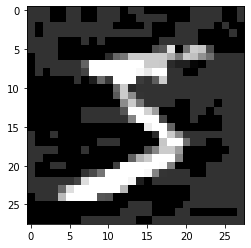

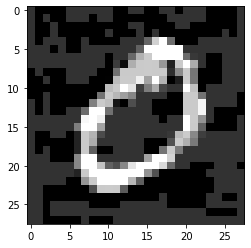

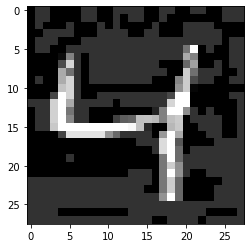

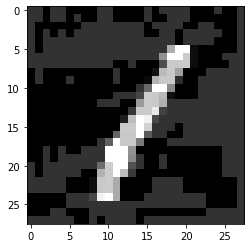

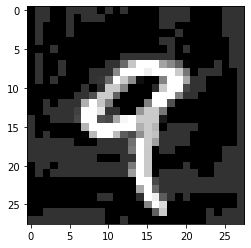

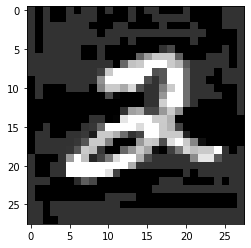

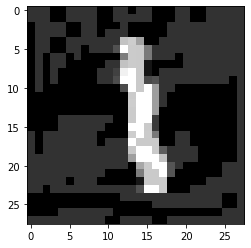

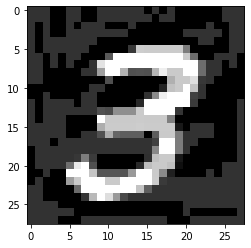

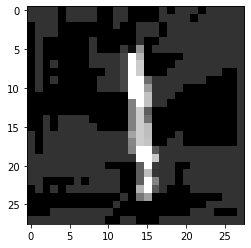

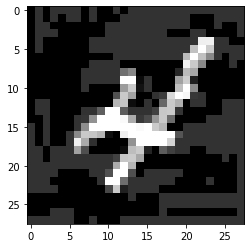

In [21]:
for i in range(batch_size):
    MnistData.display(adversarial_examples[i])